# Plots of the trajectories of merging events

In [1]:
import os
import csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def fileinput_from_file (input_directory_file):
    
    input_directory_file = "Data/" + input_directory_file +".dat"    ### CAMBIA LA DIRECTORY

    df = pd.read_csv( input_directory_file , sep=",", header=0)
    print("OK! Uploaded file:",input_directory_file)
    return(df)  

In [2]:
data_phy_NSC = fileinput_from_file("NSC_N10000_ok_phy") 
data_nb_NSC = fileinput_from_file("NSC_N10000_ok_nb") 
data_phy_YSC = fileinput_from_file("YSC_N10000_ok_phy") 
data_nb_YSC = fileinput_from_file("YSC_N10000_ok_nb") 

OK! Uploaded file: Data/NSC_N10000_ok_phy.dat
OK! Uploaded file: Data/NSC_N10000_ok_nb.dat
OK! Uploaded file: Data/YSC_N10000_ok_phy.dat
OK! Uploaded file: Data/YSC_N10000_ok_nb.dat


In [3]:
# An examples
data_phy_NSC[data_phy_NSC.event == "merge"].head()

,m,x,y,z,vx,vy,vz,Eb,simulation,event
3483,9.785056e+31,2.452733e+16,6.729434e+16,-1.168997e+16,8313.260482,23745.785601,-3643.777589,-1.734532e+41,1161,merge
3484,2.181282e+31,-1.100277e+17,-3.018771e+17,5.244029e+16,-37292.625791,-106521.706886,16345.696659,-0.000000e+00,1161,merge
3485,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-0.000000e+00,1161,merge
4347,1.376237e+32,-2.462175e+16,3.417534e+15,1.431820e+16,-12398.936922,1076.400959,6289.572938,-0.000000e+00,1449,merge
4348,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-0.000000e+00,1449,merge


#### Simple function to count each type of the events

In [4]:
def count_events (dataframe):
    counts = np.array( [len(dataframe[dataframe.event == 'flyby']),
                        len(dataframe[dataframe.event == 'change13']),
                        len(dataframe[dataframe.event == 'change23']),
                        len(dataframe[dataframe.event == 'ionization']),
                        len(dataframe[dataframe.event == 'merge']),
                        len(dataframe[dataframe.event == 'Not_found']) ] )
    df=pd.DataFrame(counts/3, columns=["counts"], index = ["flyby","change13","change23","ionization","merge","Not_found"] ).T
    return(df)



N=10000

NSC_events_phy = count_events(data_phy_NSC)

NSC_events_nb = count_events(data_nb_NSC)

YSC_events_phy = count_events(data_phy_YSC)

YSC_events_nb = count_events(data_nb_YSC)

In [5]:
#An example
NSC_events_phy

,flyby,change13,change23,ionization,merge,Not_found
counts,7928.0,313.0,727.0,1009.0,22.0,1.0


## Merging Events

In [6]:
merge_N_df = data_nb_NSC[data_nb_NSC.event == 'merge']
merge_Y_df = data_nb_YSC[data_nb_YSC.event == 'merge']

merge_N_sim_num = np.unique(np.array(merge_N_df.simulation.values))
merge_Y_sim_num = np.unique(np.array(merge_Y_df.simulation.values))

print("Simulation number of merging event for NSC:\n", merge_N_sim_num, "\nTot event:", np.count_nonzero(merge_N_sim_num))
print("\n\nSimulation number of merging event for YSC:\n", merge_Y_sim_num, "\nTot event:", np.count_nonzero(merge_Y_sim_num))

Simulation number of merging event for NSC:
 [1161 1449 1878 2048 2252 2623 3037 3077 3212 3446 4297 5435 5480 5727
 6064 6389 6820 7198 8692 8764 9427 9492] 
Tot event: 22


Simulation number of merging event for YSC:
 [1758 2416 4789 5111 7412 7911 8430 8856 9208 9768 9926] 
Tot event: 11


## Function to plot trajectories 3D of Mergin event

#### Could be selected to plot also the  initial trajectory of the binary BHs


In [7]:
def plot_simulation(type_cluster, num_sim, lim_sup=0, lim_inf=0, plot_binary=False,point_after_merging= 150):
    
    names = ['m', 'x', 'y', 'z', 'vx', 'vy', 'vz']
    
    idx_merge=0
    test = 0

    pos1 = np.zeros((1001, 3))
    pos2 = np.zeros((1001, 3))
    pos3 = np.zeros((1001, 3))    


    for i in range(1001):

        n = str(1000000 + i)
        df = pd.read_csv( str(type_cluster)+'_t100/TBS_'+ str(num_sim) +'/'+ n +'.dat', sep="\s+", header=None, names=names, float_precision='round_trip')
        for j, coord in enumerate(['x', 'y', 'z']):
            pos1[i][j] = df[coord][0]
            pos2[i][j] = df[coord][1]
            pos3[i][j] = df[coord][2]

        merger_tmp = pd.read_csv( str(type_cluster)+'_t100/TBS_'+ str(num_sim) +'/Merge.dat', sep="\s+", header=None)
        mergers= (merger_tmp.T[1:3].T.values).tolist()
        mergers = [mergers[0][0], mergers[0][1]]
        
        if test == 0:
            if (np.all(pos1[i] == 0) ==True) or (np.all(pos2[i] == 0)==True) or (np.all(pos3[i] == 0) == True) :
                idx_merge = i
                test=1

    lim_sup = idx_merge + point_after_merging
    if lim_sup > 1000: lim_sup=1000
    #print(idx_merge, lim_sup)
    pos1 = pos1[0:lim_sup,:]
    pos2 = pos2[0:lim_sup,:]
    pos3 = pos3[0:lim_sup,:]
    #print(len(pos1))
            
    #print(df)

    # Scaling        
    L_scale = 3.08567758130573e16    # in m (1 pc --> 3.08567758130573 * 10^16 m)

    x1 = pos1[:, 0]  * L_scale
    y1 = pos1[:, 1] * L_scale
    z1 = pos1[:, 2] * L_scale

    x2 = pos2[:, 0] * L_scale
    y2 = pos2[:, 1] * L_scale
    z2 = pos2[:, 2] * L_scale

    x3 = pos3[:, 0] * L_scale
    y3 = pos3[:, 1] * L_scale
    z3 = pos3[:, 2] * L_scale


    
    #-----------------------------  PLOT 3D - binary -------------------------
    if plot_binary == True :
        fig = plt.figure(figsize=(10,10))
        ax = plt.axes(projection='3d')

        ax.plot3D(x1[lim_inf : lim_sup], y1[lim_inf : lim_sup], z1[lim_inf : lim_sup], c='red', label='BH1')
        ax.plot3D(x2[lim_inf : lim_sup], y2[lim_inf : lim_sup], z2[lim_inf : lim_sup], c='blue', label='BH2')
        ax.scatter3D(x1[lim_sup-1], y1[lim_sup-1], z1[lim_sup-1], c='red',  s=100)
        ax.scatter3D(x2[lim_sup-1], y2[lim_sup-1], z2[lim_sup-1], c='blue', s=100)

        plt.legend(loc='best')
        plt.title("Binary BHs")

        x_mat = np.array([x1,x2])
        y_mat = np.array([y1,y2])
        z_mat = np.array([z1,z2])
        ax.set_xlim3d(np.amin(x_mat),np.amax(x_mat) )
        ax.set_ylim3d(np.amin(y_mat),np.amax(y_mat) )
        ax.set_zlim3d(np.amin(z_mat),np.amax(z_mat) )
    
    
#-------------------------- PLOT 3D - 3 bodies-----------------------------------------------------------
    
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    plt.title("3-bodies dynamic")
    
    if mergers==[1,2]: 
        #plot the starting point 
        ax.plot3D(x1[0], y1[0], z1[0],marker='^',markersize=15,fillstyle='none', c='red')
        ax.plot3D(x2[0], y2[0], z2[0],marker='^',markersize=15,fillstyle='none', c='blue')
        ax.plot3D(x3[0], y3[0], z3[0],marker='^' ,markersize=15,fillstyle='none', c='green' )
        
        
        # until the merge appended, plot all 3 BHs
        ax.plot3D(x1[lim_inf : idx_merge+1], y1[lim_inf : idx_merge+1], z1[lim_inf : idx_merge+1],lw=3, c='red', label='BH1')
        ax.plot3D(x2[lim_inf : idx_merge+1], y2[lim_inf : idx_merge+1], z2[lim_inf : idx_merge+1], c='blue', label='BH2')
        ax.plot3D(x3[lim_inf : idx_merge+1], y3[lim_inf : idx_merge+1], z3[lim_inf : idx_merge+1], c='green', label='BH3')
        
        #plot the merging point
        ax.plot3D(x1[idx_merge], y1[idx_merge], z1[idx_merge], marker="*", markersize=12,markeredgewidth = 2, c='black', label = "merging point")
        ax.plot3D(x3[idx_merge], y3[idx_merge], z3[idx_merge],marker=".", markersize=10, c='green')
        
        # after merging only the remaining ones
        ax.plot3D(x1[idx_merge : lim_sup], y1[idx_merge : lim_sup], z1[idx_merge : lim_sup], ls="--", c='black', label='BH1 + BH2')
        ax.plot3D(x3[idx_merge : lim_sup], y3[idx_merge : lim_sup], z3[idx_merge : lim_sup], ls ="--",alpha=0.5, c='green')
        
        ax.scatter3D(x1[lim_sup-1], y1[lim_sup-1], z1[lim_sup-1], c='black'  , s=100)
        #ax.scatter3D(x2[lim_sup-1], y2[lim_sup-1], z2[lim_sup-1], c='blue' , s=100)
        ax.scatter3D(x3[lim_sup-1], y3[lim_sup-1], z3[lim_sup-1], c='green', s=100)
        plt.legend(loc='best')

        #x_mat = np.array([x1,x2])
        #y_mat = np.array([y1,y2])
        #z_mat = np.array([z1,z2])
        #ax.set_xlim3d(np.amin(1.5 * x_mat),np.amax(1.5 * x_mat) )
        #ax.set_ylim3d(np.amin(1.5 * y_mat),np.amax(1.5 * y_mat) )
        #ax.set_zlim3d(np.amin(1.5 * z_mat),np.amax(1.5 * z_mat) )
        
    if mergers==[1,3]: 
        #plot the starting point 
        ax.plot3D(x1[0], y1[0], z1[0],marker='^',markersize=15,fillstyle='none', c='red')
        ax.plot3D(x2[0], y2[0], z2[0],marker='^',markersize=15,fillstyle='none', c='blue')
        ax.plot3D(x3[0], y3[0], z3[0],marker='^' ,markersize=15,fillstyle='none', c='green' )
        
        # until the merge appended, plot all 3 BHs
        ax.plot3D(x1[lim_inf : idx_merge+1], y1[lim_inf : idx_merge+1], z1[lim_inf : idx_merge+1], lw=3, c='red', label='BH1')
        ax.plot3D(x2[lim_inf : idx_merge+1], y2[lim_inf : idx_merge+1], z2[lim_inf : idx_merge+1], c='blue', label='BH2')
        ax.plot3D(x3[lim_inf : idx_merge+1], y3[lim_inf : idx_merge+1], z3[lim_inf : idx_merge+1], c='green', label='BH3')
        
        #plot the merging point ( begin --- after the merging point)
        ax.plot3D(x1[idx_merge], y1[idx_merge], z1[idx_merge], marker="*", markersize=12, c='orange', label = "merging point")
        ax.plot3D(x2[idx_merge], y2[idx_merge], z2[idx_merge],marker=".", markersize=10, c='blue')
        
        # after merging only the remaining ones
        ax.plot3D(x1[idx_merge : lim_sup], y1[idx_merge : lim_sup], z1[idx_merge : lim_sup],ls="--", c='orange', label='BH1 + BH3')
        ax.plot3D(x2[idx_merge : lim_sup], y2[idx_merge : lim_sup], z2[idx_merge : lim_sup], ls ="--",alpha=0.5, c='blue')
        
        ax.scatter3D(x1[lim_sup-1], y1[lim_sup-1], z1[lim_sup-1], c='orange'  , s=100)
        ax.scatter3D(x2[lim_sup-1], y2[lim_sup-1], z2[lim_sup-1], c='blue'    , s=100)
        #ax.scatter3D(x3[lim_sup-1], y3[lim_sup-1], z3[lim_sup-1], c='green', s=100)
        plt.legend(loc='best')
    
        #x_mat = np.array([x1,x3])
        #y_mat = np.array([y1,y3])
        #z_mat = np.array([z1,z3])
        #ax.set_xlim3d(np.amin(1.5 * x_mat),np.amax(1.5 * x_mat) )
        #ax.set_ylim3d(np.amin(1.5 * y_mat),np.amax(1.5 * y_mat) )
        #ax.set_zlim3d(np.amin(1.5 * z_mat),np.amax(1.5 * z_mat) )
        
    if mergers==[2,3]: 
        #plot the starting point 
        ax.plot3D(x1[0], y1[0], z1[0],marker='^',markersize=10,fillstyle='none', c='red')
        ax.plot3D(x2[0], y2[0], z2[0],marker='^',markersize=10,fillstyle='none', c='blue')
        ax.plot3D(x3[0], y3[0], z3[0],marker='^' ,markersize=10,fillstyle='none', c='green' )
        
        # until the merge appended, plot all 3 BHs
        ax.plot3D(x1[lim_inf : idx_merge+1], y1[lim_inf : idx_merge+1], z1[lim_inf : idx_merge+1], c='red', label='BH1')
        ax.plot3D(x2[lim_inf : idx_merge+1], y2[lim_inf : idx_merge+1], z2[lim_inf : idx_merge+1], c='blue', label='BH2')
        ax.plot3D(x3[lim_inf : idx_merge+1], y3[lim_inf : idx_merge+1], z3[lim_inf : idx_merge+1],lw=3, c='green', label='BH3')
        
        #plot the merging point ( begin --- after the merging point)
        ax.plot3D(x1[idx_merge], y1[idx_merge], z1[idx_merge], marker=".", markersize=10, c='red')
        ax.plot3D(x2[idx_merge], y2[idx_merge], z2[idx_merge], marker="*", markersize=12, c='violet', label = "merging point")
        
        # after merging only the remaining ones
        ax.plot3D(x1[idx_merge : lim_sup], y1[idx_merge : lim_sup], z1[idx_merge : lim_sup], ls ="--",alpha=0.5, c='red')
        ax.plot3D(x2[idx_merge : lim_sup], y2[idx_merge : lim_sup], z2[idx_merge : lim_sup], ls="--", c='violet', label='BH2 + BH3')
        
        ax.scatter3D(x1[lim_sup-1], y1[lim_sup-1], z1[lim_sup-1], c='red'  , s=100)
        ax.scatter3D(x2[lim_sup-1], y2[lim_sup-1], z2[lim_sup-1], c='violet' , s=100)
        #ax.scatter3D(x3[lim_sup-1], y3[lim_sup-1], z3[lim_sup-1], c='green', s=100)
        plt.legend(loc='best')
    
        #x_mat = np.array([x3,x2])
        #y_mat = np.array([y3,y2])
        #z_mat = np.array([z3,z2])
        #ax.set_xlim3d(np.amin(1.5 * x_mat),np.amax(1.5 * x_mat) )
        #ax.set_ylim3d(np.amin(1.5 * y_mat),np.amax(1.5 * y_mat) )
        #ax.set_zlim3d(np.amin(1.5 * z_mat),np.amax(1.5 * z_mat) )
        
    
    #print(mergers)
    #print("x range : [{},{}]\n".format(np.amin(x_mat),np.amax(x_mat)))
    #print("y range : [{},{}]\n".format(np.amin(y_mat),np.amax(y_mat)))
    #print("z range : [{},{}]\n".format(np.amin(z_mat),np.amax(z_mat)))

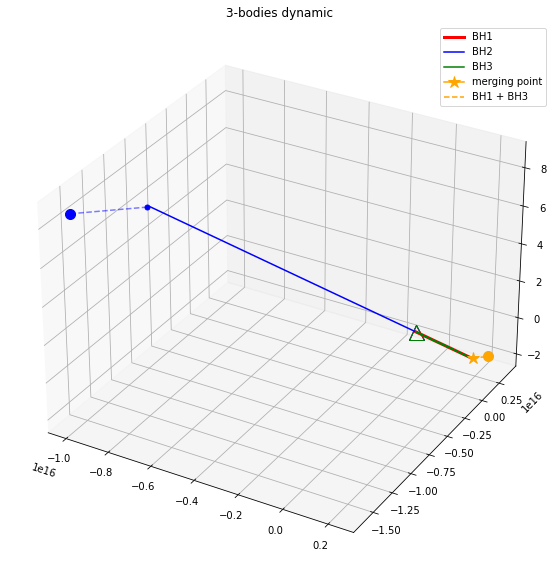

In [8]:
# Example of the 1 simulation of NSC categorized as MERGE
plot_simulation("NSC", num_sim=merge_N_sim_num[0], plot_binary= False, point_after_merging=15)

<ipython-input-7-2ab3a277de53>:81: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,10))


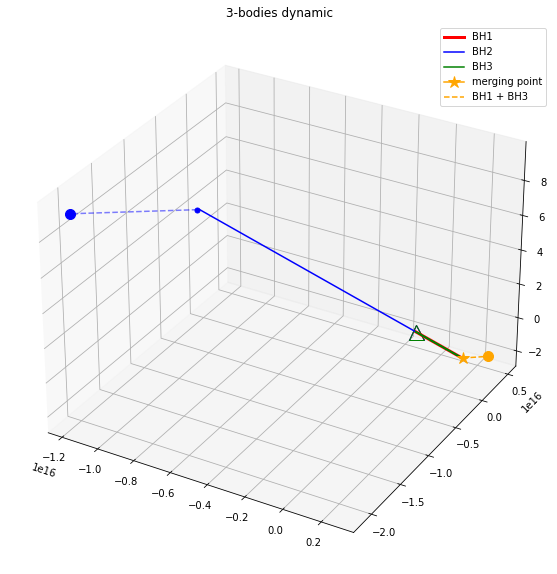

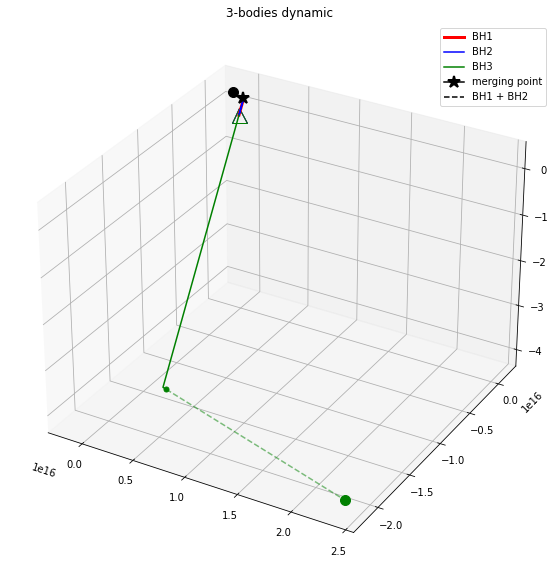

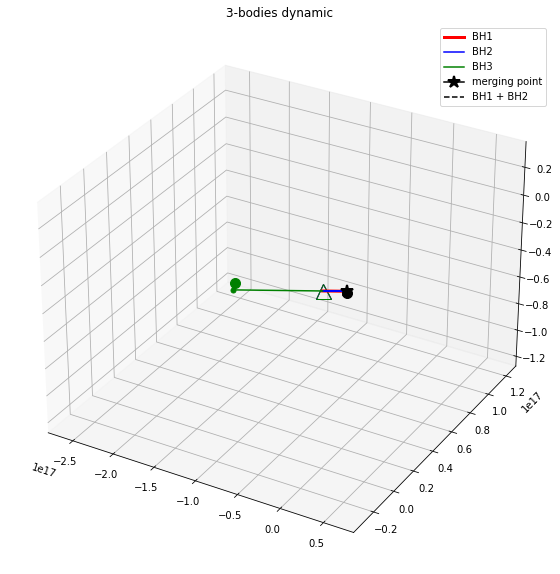

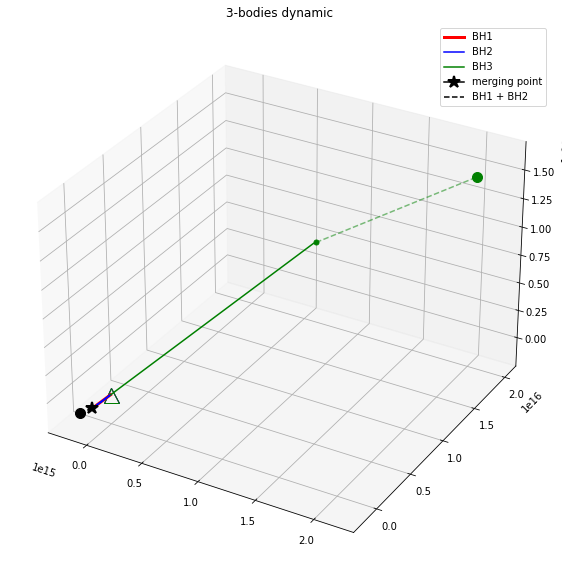

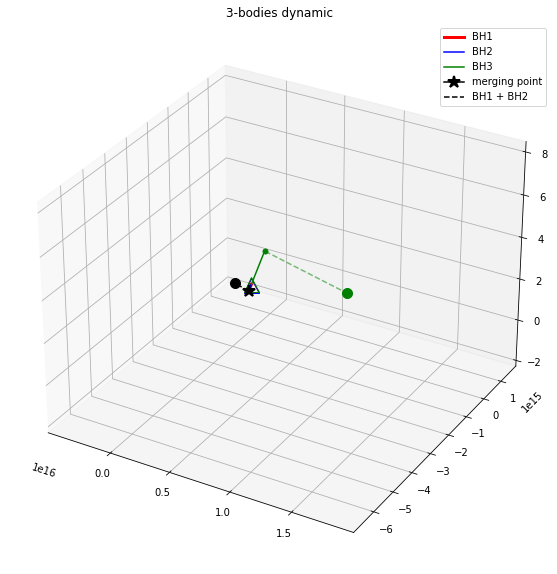

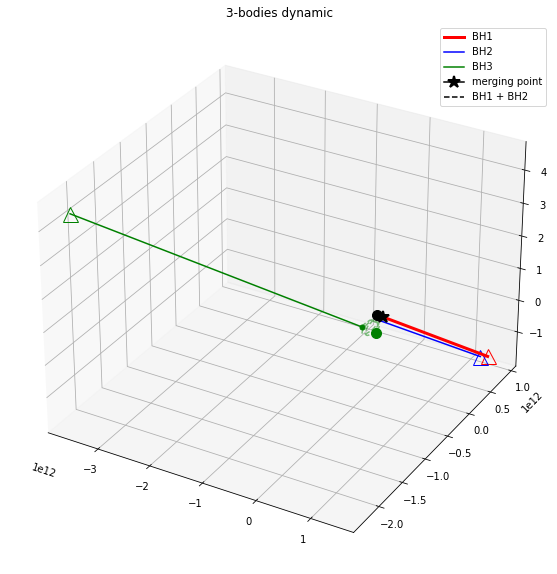

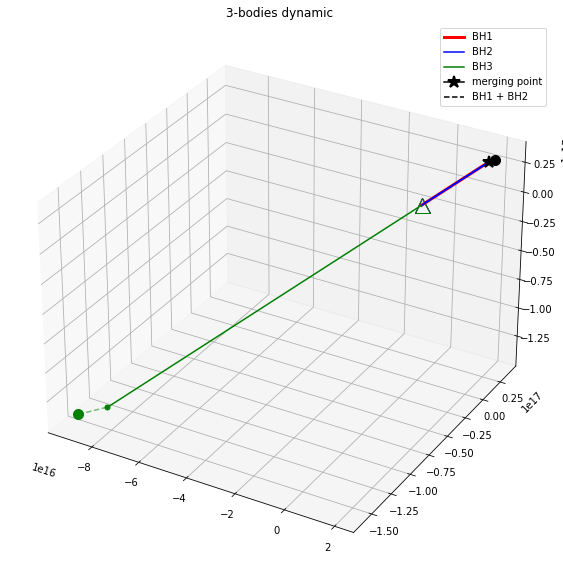

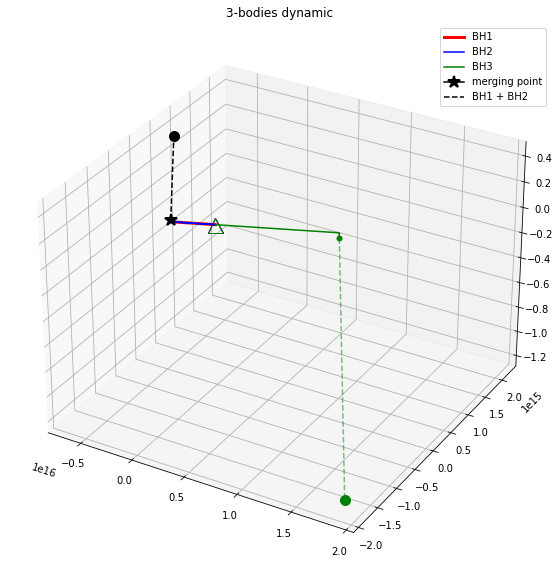

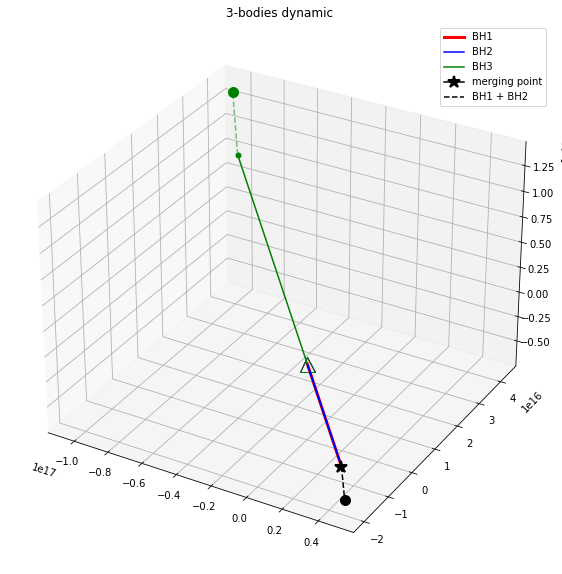

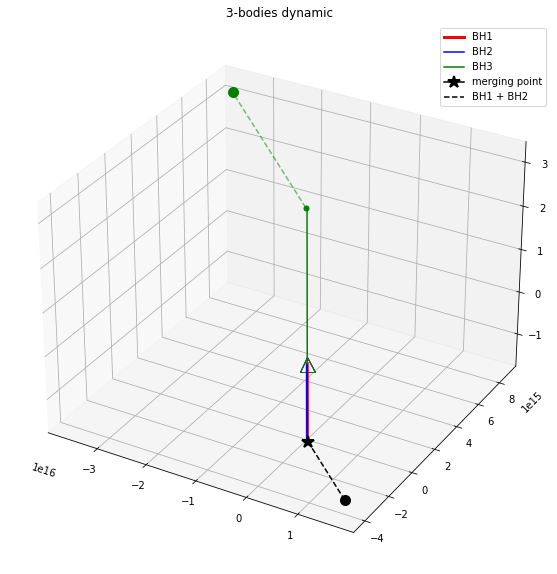

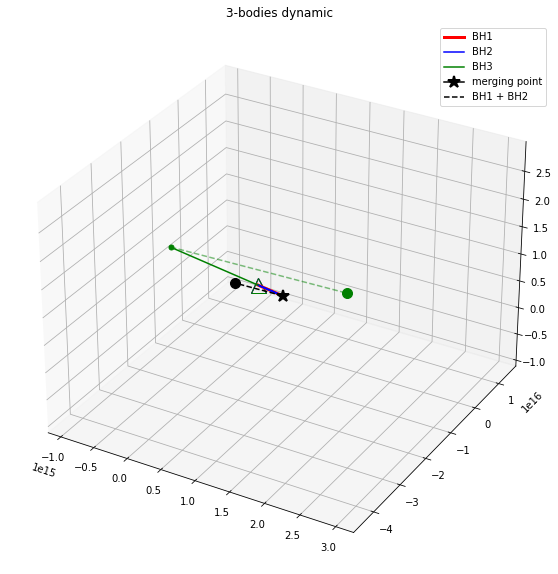

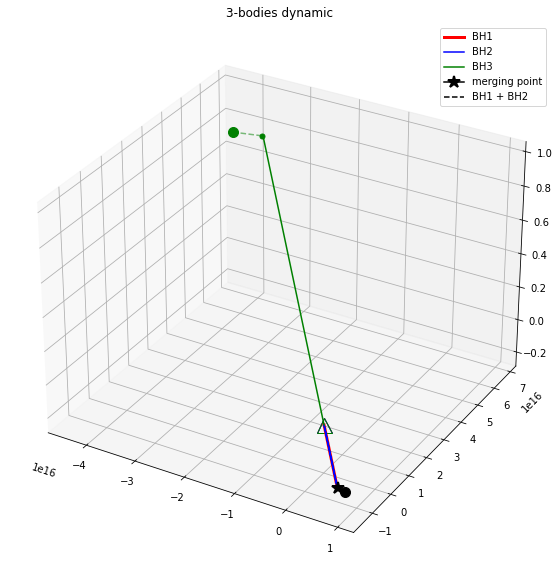

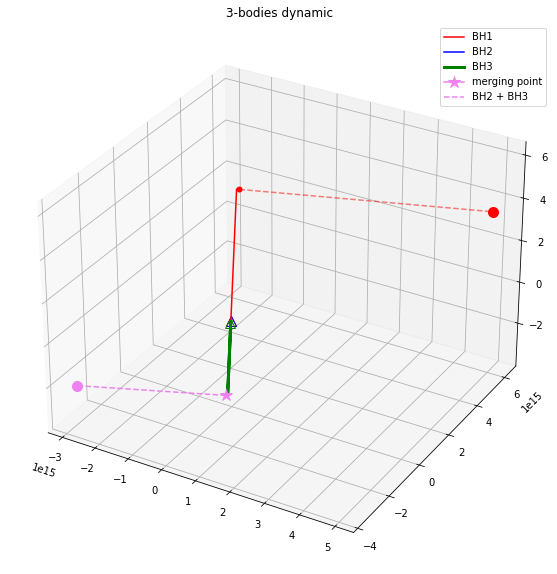

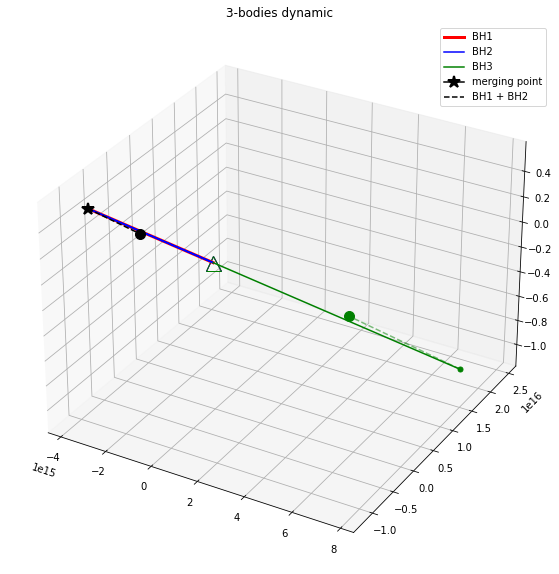

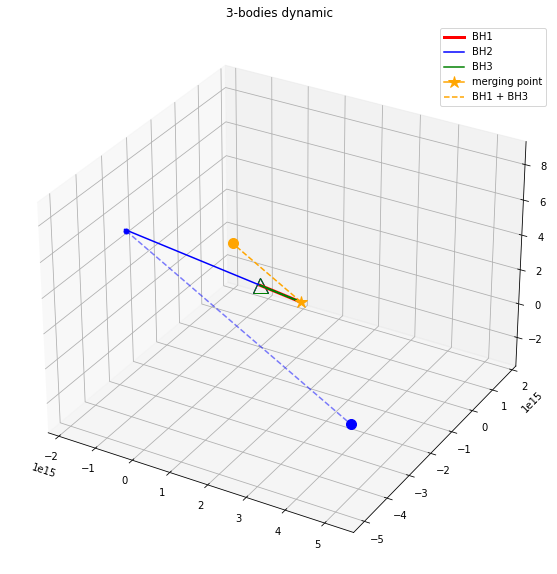

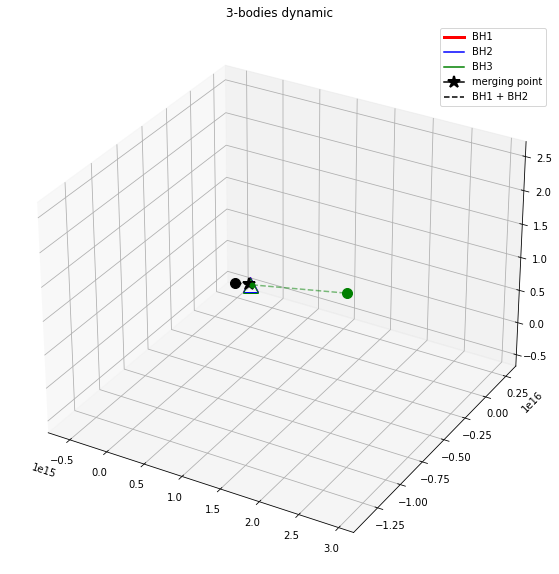

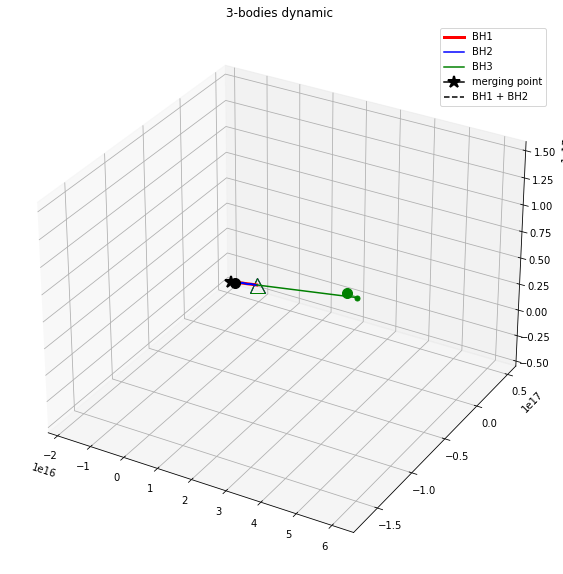

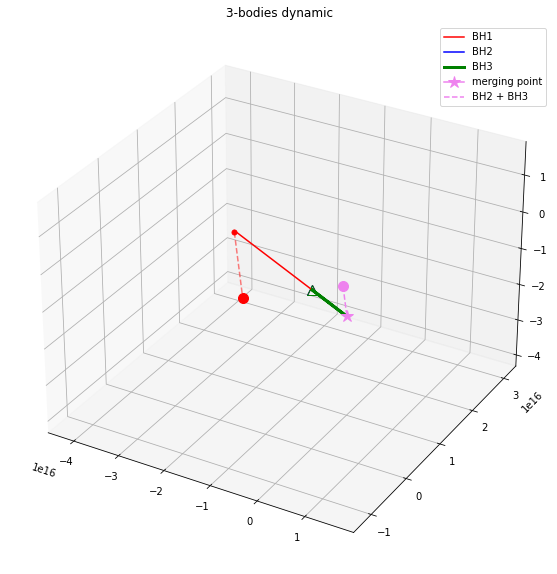

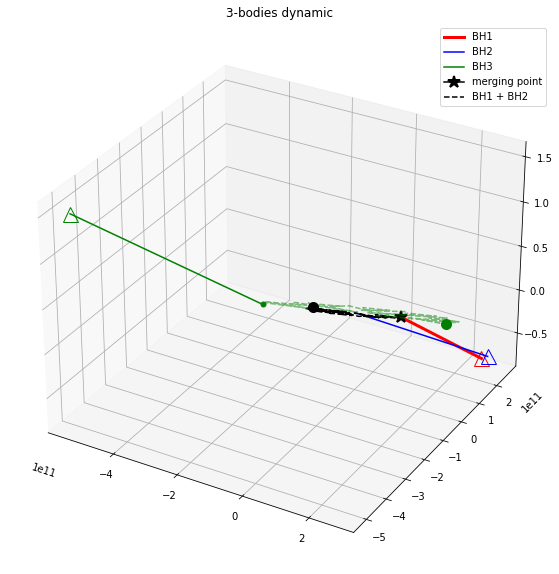

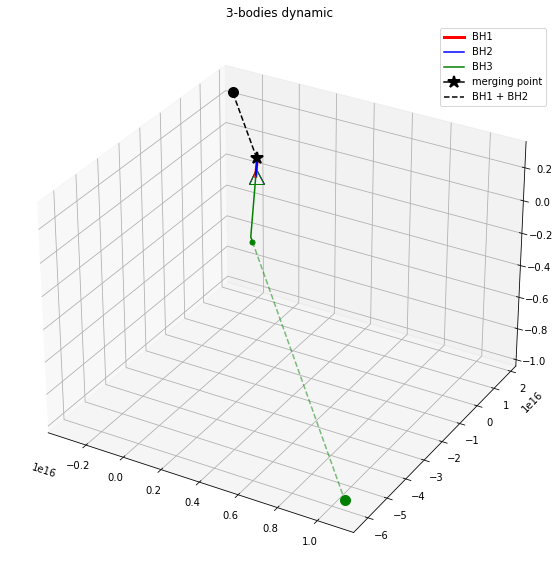

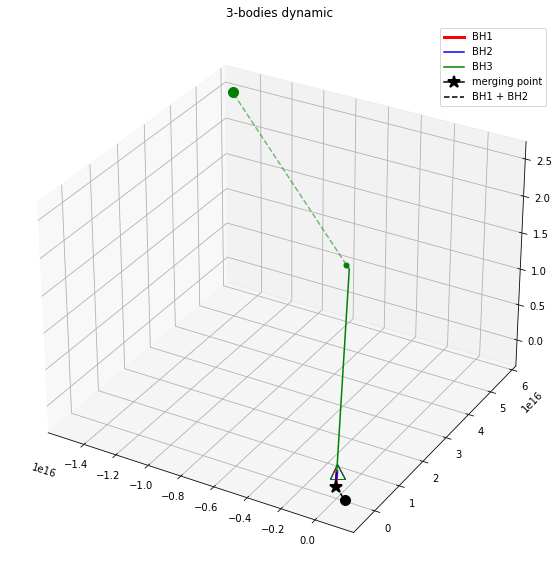

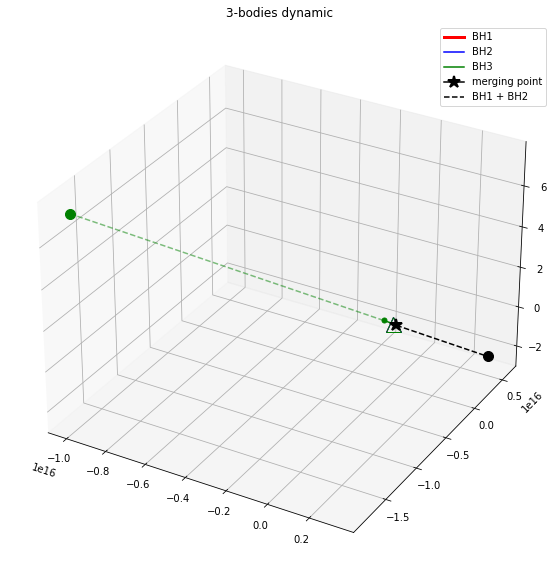

In [9]:
#Plots for NSC
for i in range(len(merge_N_sim_num)): 
    #print("simulation {} of {}".format(i,len(merge_N_sim_num) ))
    plot_simulation("NSC", num_sim=merge_N_sim_num[i], plot_binary=False, point_after_merging=30)

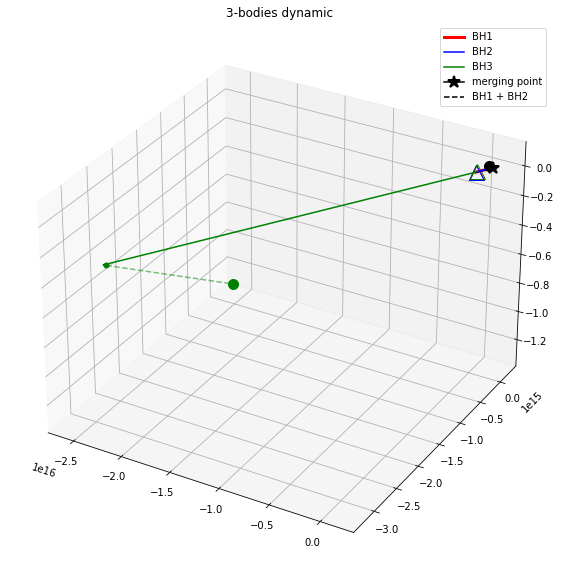

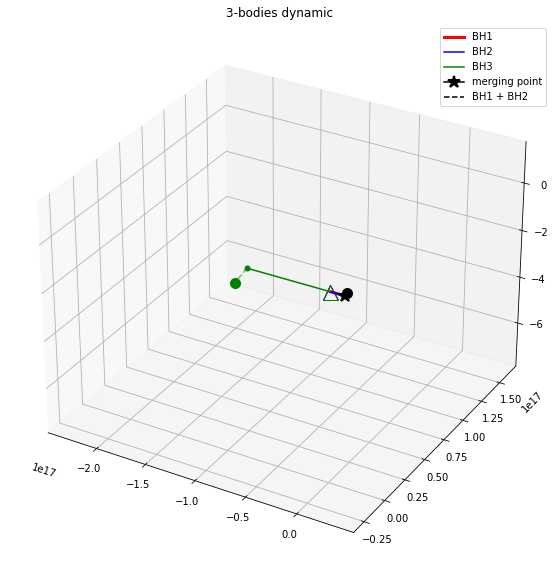

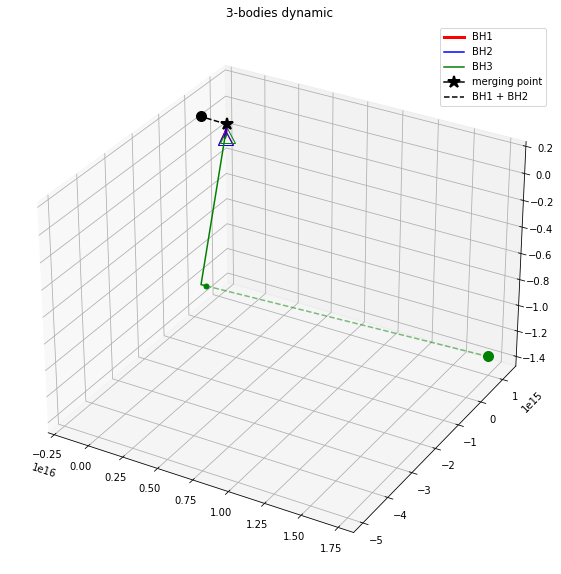

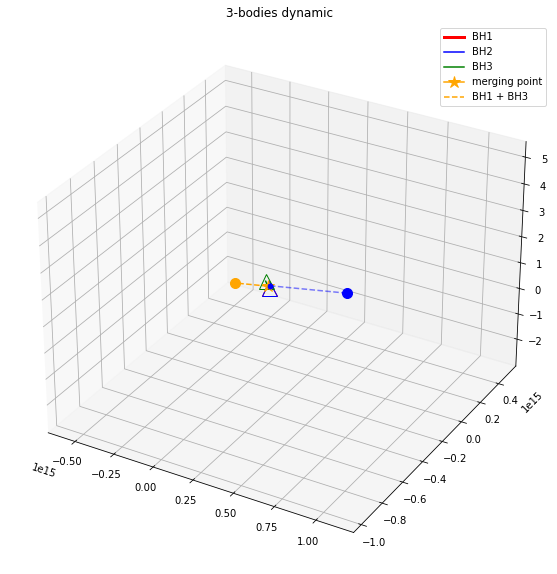

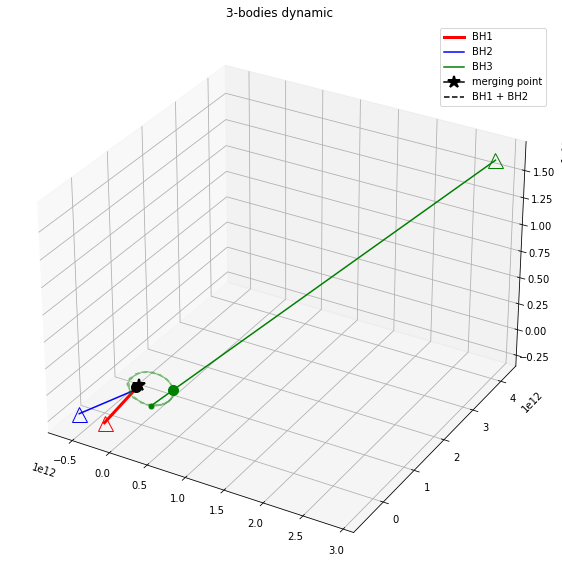

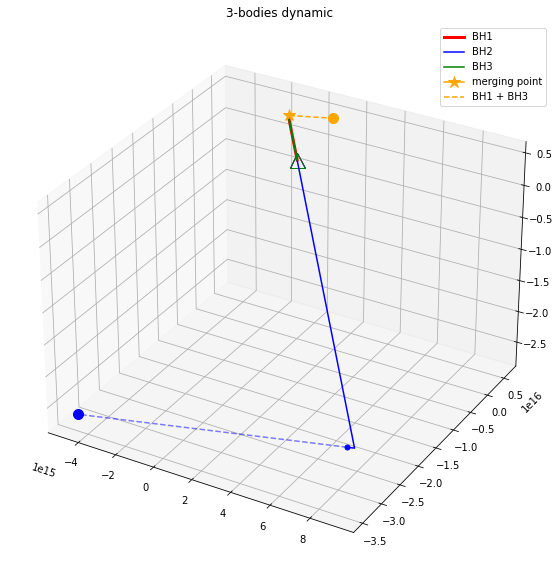

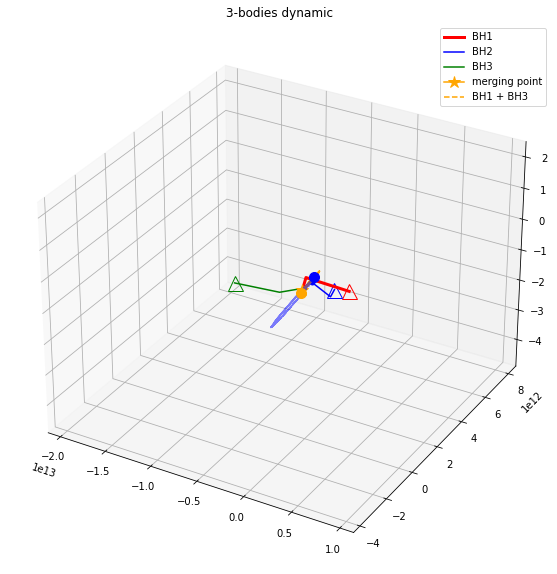

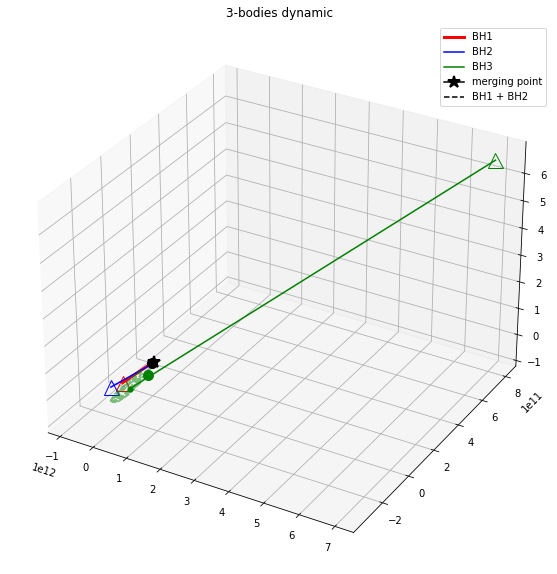

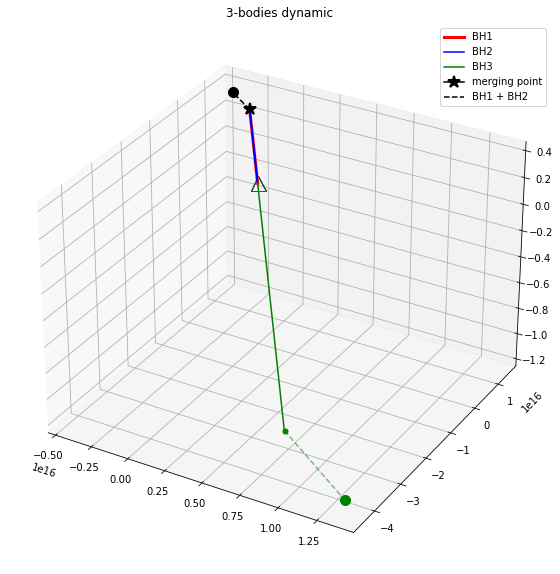

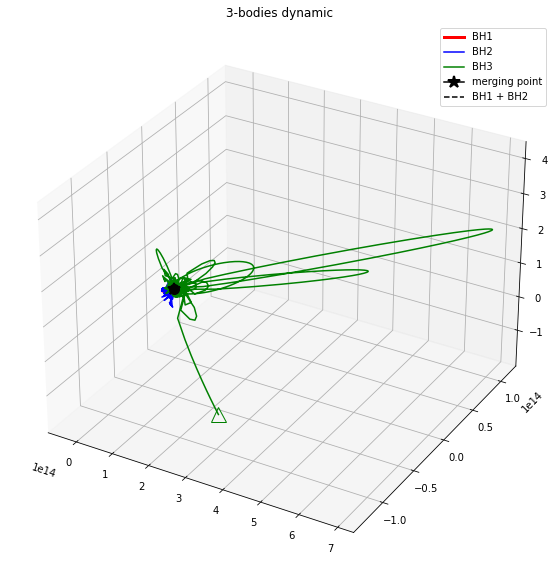

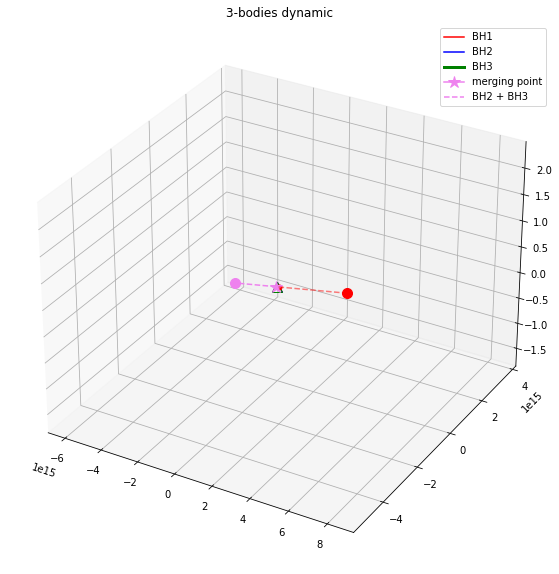

In [10]:
#Plots for YSC
for i in range(len(merge_Y_sim_num)): 
    plot_simulation("YSC", num_sim=merge_Y_sim_num[i], plot_binary=False, point_after_merging=30)